# Réservations d'hôtels

Ce dataset fournit des données sur des réservations d'hôtels, telles que les dates d'arrivée et de départ, le nombre de
nuits passées, le nombre de clients, les annulations etc...
L'objectif ici est de construire un modèle d'apprentissage machine capable de prédire les probabilités d'une annulation
pour une commande donnée.

### Importation des bibliothèques

In [167]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder as LE

## 1 - Exploration des données

### Importation du dataset

On affecte le dataset à une variable de type DataFrame. </br>
On peut voir que le DataFrame contient 119390 lignes pour 32 colonnes.

In [168]:
df = pd.read_csv("./hotel_bookings.csv")
df.shape

(119390, 32)

### Affichage des informations du DataFrame

On observe ici une description des informations du DataFrame. </br>
Le type de chaque colonne est affiché ainsi que le nombre d'occurences de valeurs non nulle.
Le total de chaque type présent est aussi décrit

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Statistiques descriptives

Ce tableau affiche pour chaque colonne le total d'occurences, la moyenne, la médiane, les valeurs minimum et maximum
ainsi que les quartiles.

In [170]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Heatmap de corrélation

La heatmap de corrélation permet de représenter la corrélation pour chaque paire de colonnes à l'aide d'un code couleur.
On observe ici aucune corrélation particulière entre les données.

<AxesSubplot:>

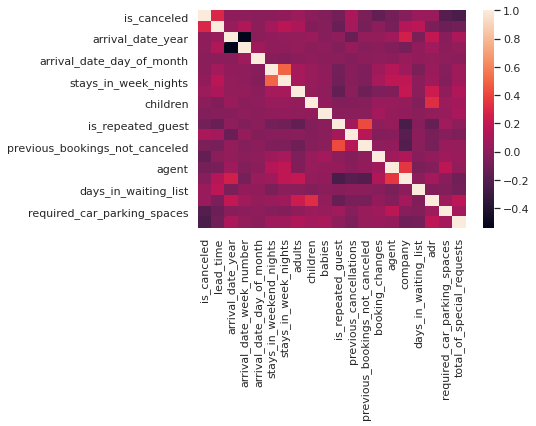

In [171]:
corr = df.corr()
sns.set()
sns.heatmap(corr)

In [172]:
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
53201,City Hotel,1,350,2016,June,25,17,0,2,1,...,Non Refund,29.0,NaN,0,Transient,130.00,0,0,Canceled,2015-08-11
112842,City Hotel,0,33,2017,May,21,26,1,2,2,...,No Deposit,7.0,NaN,0,Transient,174.80,0,1,Check-Out,2017-05-29
20089,Resort Hotel,0,0,2016,February,8,15,1,1,1,...,No Deposit,NaN,NaN,0,Transient,30.00,0,0,Check-Out,2016-02-17
104279,City Hotel,0,2,2017,January,1,7,2,1,2,...,No Deposit,28.0,NaN,0,Transient,121.00,0,0,Check-Out,2017-01-10
75347,City Hotel,1,311,2015,August,35,24,1,1,2,...,Non Refund,1.0,NaN,0,Transient-Party,62.00,0,0,Canceled,2015-07-02
39349,Resort Hotel,0,67,2017,August,32,11,2,3,2,...,No Deposit,40.0,NaN,0,Contract,165.00,0,0,Check-Out,2017-08-16
55541,City Hotel,1,172,2016,August,34,15,1,5,2,...,No Deposit,9.0,NaN,0,Transient,90.67,0,0,Canceled,2016-03-18
83644,City Hotel,0,0,2016,February,7,8,1,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2016-02-09
38925,Resort Hotel,0,1,2017,July,30,27,2,5,2,...,No Deposit,250.0,NaN,0,Transient,216.29,0,1,Check-Out,2017-08-03
25244,Resort Hotel,0,222,2016,June,25,13,2,5,1,...,No Deposit,250.0,NaN,0,Transient,93.50,0,0,Check-Out,2016-06-20


### Gestion des NA

In [173]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [174]:
ratio_company = (df['company'].isna().sum() / len(df)) * 100
ratio_agent = (df['agent'].isna().sum() / len(df)) * 100
ratio_country = (df['country'].isna().sum() / len(df)) * 100

print("Company null ratio : " + str(ratio_company) + "\n" +
      "Agent null ratio : " + str(ratio_agent) + "\n" +
      "Country null ratio : " + str(ratio_country))

Company null ratio : 94.30689337465449
Agent null ratio : 13.686238378423655
Country null ratio : 0.40874445095904177


On observe que les colonnes company et agent ont un pourcentage important de valeurs nulles, c'est pourquoi
nous allons les retirer du dataset

In [175]:
df = df.drop(columns=['company', 'agent'])

In [176]:
df = df.dropna()
df.shape

(118898, 30)

In [177]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

### Transformation des variables catégoriques en variables quantitatives

In [179]:
df['arrival_date_month'] = df['arrival_date_month'].astype('category').cat.codes

In [180]:
le = LE()
df['hotel'] = le.fit_transform(df['hotel'])
df['country'] = le.fit_transform(df['country'])
df['market_segment'] = le.fit_transform(df['market_segment'])
df['distribution_channel'] = le.fit_transform(df['distribution_channel'])
df['reserved_room_type'] = le.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = le.fit_transform(df['assigned_room_type'])
df['deposit_type'] = le.fit_transform(df['deposit_type'])
df['customer_type'] = le.fit_transform(df['customer_type'])
df['reservation_status'] = le.fit_transform(df['reservation_status'])

In [181]:
df = df.drop(columns=['meal'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  int64  
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  int8   
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  country         

<AxesSubplot:>

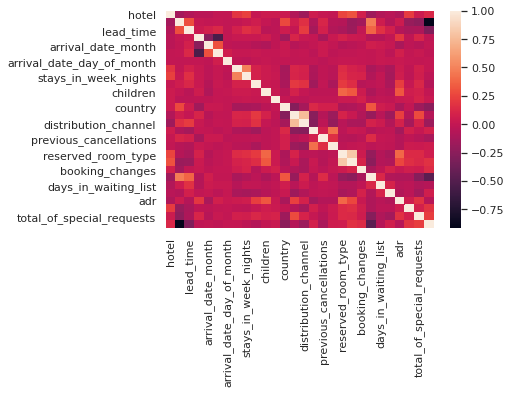

In [182]:
corr = df.corr()
# corr = df.corr()['is_canceled']
# corr.abs().sort_values(ascending=False)[1:]
sns.heatmap(corr)